# First-level subjectwise GLM analysis

STEP 2: Subject-wise GLM for the slope regressor

In [1]:
# import packages, check folders
#%reset
from pathlib import Path
import os
import numpy as np
import h5py
import pandas as pd
#import imagesc as imagesc #pip install imagesc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time
import pickle

%matplotlib inline

working_dir = '/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code'
#working_dir = os.getcwd()
print('current directory:\n',working_dir)
path = Path(working_dir)
parent_folder = path.parent
#print('parent folder:', parent_folder)
data_file_loc = os.path.join(parent_folder,'data') # to store data we extract later in this notebook

current directory:
 /Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code


In [2]:
# load regressors
timepts_indiv_movie, reg_all, reg_conv_all, respreg_all, respreg_conv_all = pickle.load(open(os.path.join(data_file_loc,'movie_wise_regs_windows.p'),"rb"))
                                                                                        # load regs
    
# each is a list of 10: each element a timecourse

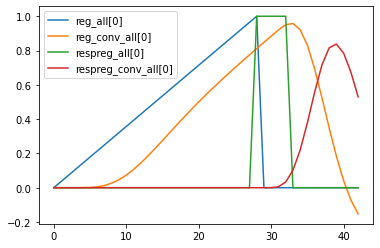

In [3]:
#verify regressors
plt.plot(reg_all[0],label ='reg_all[0]')
plt.plot(reg_conv_all[0], label = 'reg_conv_all[0]')
plt.plot(respreg_all[0],label ='respreg_all[0]')
plt.plot(respreg_conv_all[0], label = 'respreg_conv_all[0]')
plt.legend()

In [4]:
from sklearn.linear_model import LinearRegression

In [6]:
X.shape

(43, 2)

In [7]:
# load each movie, perform linear regression for each sub and roi for that movie
nmovies = 10
start = time.time()
for m in range(nmovies): #50s per movie
    fileName = os.path.join(data_file_loc,f'timecourse-movie{m}.npy')
    print(fileName)
    movieTC = np.load(fileName) # nsubs * nnodes * ntimepts
    
    if m == 0:
        nnodes = movieTC.shape[1]
        print(nnodes)
        est_movie_slope = np.zeros((movieTC.shape[0],nmovies,nnodes))
        
    X = np.array([reg_conv_all[m],respreg_conv_all[m]])
    X = X.T
    X = X[:28,:]
    for s in range(movieTC.shape[0]):
        for n in range(nnodes):
            Y = movieTC[s,n,:28]
            model = LinearRegression().fit(X, Y)
            est_movie_slope[s, m, n] = model.coef_[0]
    now = time.time()
    print('movie:',m,', time elapsed:', (now - start))

/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/data/timecourse-movie0.npy
268
movie: 0 , time elapsed: 52.86664390563965
/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/data/timecourse-movie1.npy
movie: 1 , time elapsed: 108.18975782394409
/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/data/timecourse-movie2.npy
movie: 2 , time elapsed: 160.3668031692505
/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/data/timecourse-movie3.npy
movie: 3 , time elapsed: 209.45847296714783
/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/data/timecourse-movie4.npy
movie: 4 , time elapsed: 258.8802070617676
/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/data/timecourse-movie5.npy
movie: 5 , time elapsed: 307.8416938781738
/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/data/timecourse-movie6.npy
movie: 6 , time

In [26]:
#save betaper movie in data folder
fileName = os.path.join(data_file_loc,'betapermovie_slopereg.npy')
np.save(fileName, est_movie_slope)